In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
# Columns for the wildfire dataset, dependent (the class that will be predicted) and indepenent 
independent_columns = [
    "year", 
    "temp",
    "humidity",
    "rainfall",
    "drought_code",
    "buildup_index",
    "day",
    "month",
    "wind_speed"
]
dependent_column = "fire"

# Read the training csv file into the training_data variable
training_data = pd.read_csv("wildfires_training.csv")
# Index a portion of the dataframe (independent variables) and their values (fire variable is excluded from this list)
x_axis_training = training_data.loc[:,independent_columns]
# Index a portion of the dataframe (dependent variable) and its values (fire variable only)
y_axis_training = training_data.loc[:,dependent_column]

# Read the test csv file into the test_data variable
test_data = pd.read_csv("wildfires_test.csv")
# Index a portion of the dataframe (independent variables) and their values (fire variable is excluded from this list)
x_axis_test = test_data.loc[:,independent_columns]
# Index a portion of the dataframe (dependent variable) and its values (fire variable only)
y_axis_test = test_data.loc[:,dependent_column]

1.0
0.86


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


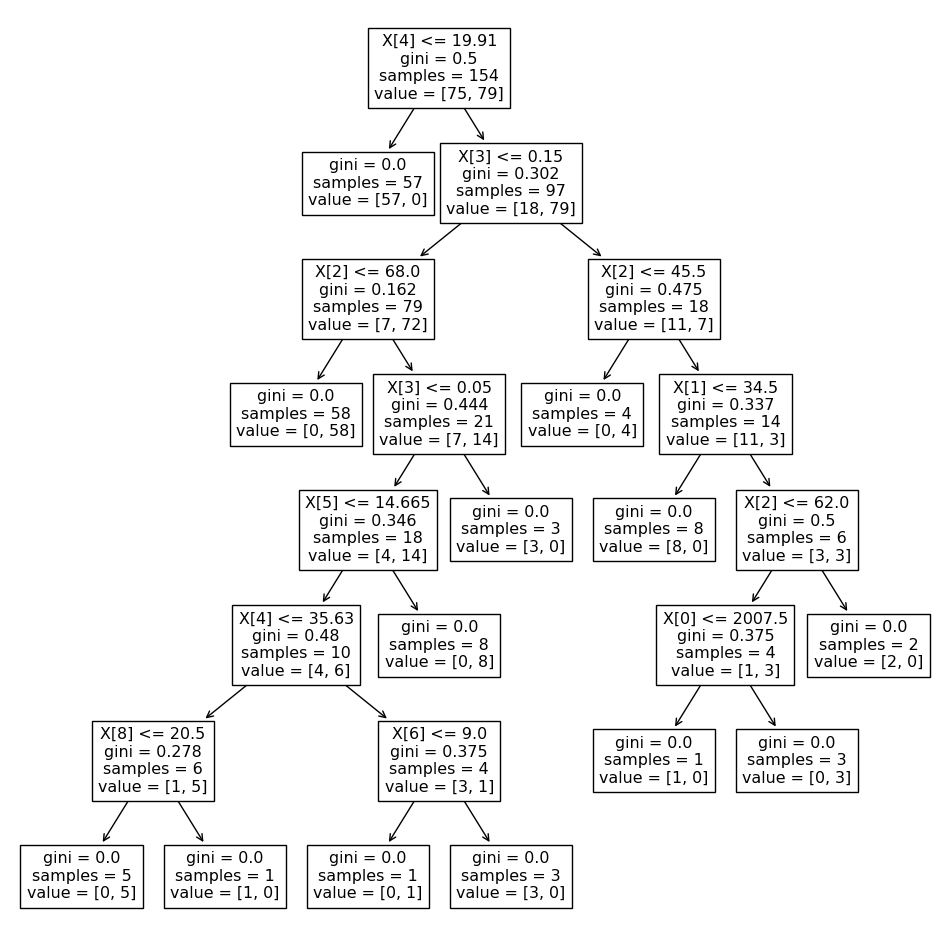

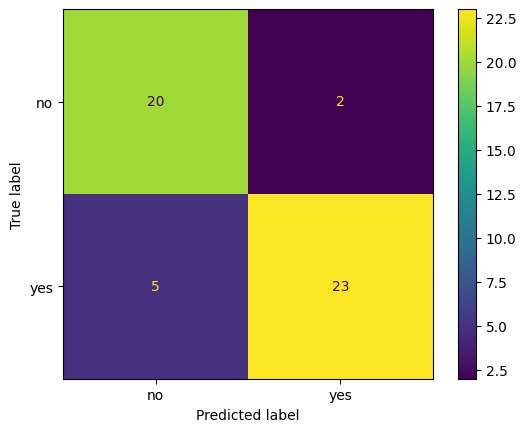

In [2]:
decision_tree_model = DecisionTreeClassifier()  # Change the hyperparameters to tweak the behaviour of the machine learning model  
# Supply the gaussian_process_model with the training data 
decision_tree_model.fit(x_axis_training, y_axis_training)

# Calculate the predictions for the training dataset and the test dataset
training_data_prediction_default = decision_tree_model.predict(x_axis_training)
test_data_prediction_default = decision_tree_model.predict(x_axis_test)
    
# Compute the prediction accuracy of the DecisionTreeClassifier for the training examples and the unseen examples 
training_data_prediction_accuracy_default = metrics.accuracy_score(y_axis_training, training_data_prediction_default)
test_data_prediction_accuracy_default = metrics.accuracy_score(y_axis_test, test_data_prediction_default)

# Default training and test data prediction accuracy 
print(training_data_prediction_accuracy_default)
print(test_data_prediction_accuracy_default)       
# Display the decision tree built by the algorithm and its corresponding confusion matrix with default settings
plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree_model)
conf_matrix = plot_confusion_matrix(decision_tree_model, x_axis_test, y_axis_test)
plt.show()

In [3]:
# Lists in range 1 => 10 for different values of max_depth and max_features
max_depth_range = list(range(1,11))
max_features = list(range(1,11))

# Empty lists for storing prediction accuracy values of training and test data
training_data_prediction_accuracy = []
test_data_prediction_accuracy = []
# List of decision trees (Used later for displaying confusion matrices)
decision_tree_models = []

# Increment change the max_depth hyperparameter at each loop pass
for j in range(len(max_depth_range)):
    # Append an empty list to the training and test lists at each J loop pass
    training_data_prediction_accuracy.append([])
    test_data_prediction_accuracy.append([])
    
    # Increment the max_features by 1 at every loop pass
    for k in range(len(max_features)):
        # Get the decision tree model
        decision_tree_model = DecisionTreeClassifier(max_depth=max_depth_range[j]+1, max_features=k+1)  # Change the hyperparameters to tweak the behaviour of the machine learning model 
        # Supply the decision_tree_model with the training data 
        decision_tree_model.fit(x_axis_training, y_axis_training)

        # Calculate the predictions for the training dataset and the test dataset
        training_data_prediction = decision_tree_model.predict(x_axis_training)
        test_data_prediction = decision_tree_model.predict(x_axis_test)
    
        # Compute the prediction accuracy of the GaussianProcess for the training examples and the unseen examples 
        training_data_prediction_accuracy[j].append(metrics.accuracy_score(y_axis_training, training_data_prediction))
        test_data_prediction_accuracy[j].append(metrics.accuracy_score(y_axis_test, test_data_prediction))
        # Append the decision tree model to the list (used later for plotting confusion matrices)
        decision_tree_models.append(decision_tree_model)
    # Print the max allowed depth and features count and the calculated prediction accuracy 
    print("max tree depth ", max_depth_range[j], "\ntraining accuracy for max features allowed 1 -> 10: ", training_data_prediction_accuracy[j]) 
    print("max tree depth ", max_depth_range[j], "\ntest accuracy for max features allowed 1 -> 10: ", test_data_prediction_accuracy[j],"\n" )   

max tree depth  1 
training accuracy for max features allowed 1 -> 10:  [0.9090909090909091, 0.8311688311688312, 0.8506493506493507, 0.8831168831168831, 0.9090909090909091, 0.8831168831168831, 0.9090909090909091, 0.8831168831168831, 0.9090909090909091, 0.9090909090909091]
max tree depth  1 
test accuracy for max features allowed 1 -> 10:  [0.84, 0.7, 0.8, 0.8, 0.84, 0.8, 0.84, 0.8, 0.84, 0.84] 

max tree depth  2 
training accuracy for max features allowed 1 -> 10:  [0.8701298701298701, 0.9285714285714286, 0.922077922077922, 0.935064935064935, 0.935064935064935, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.935064935064935, 0.935064935064935]
max tree depth  2 
test accuracy for max features allowed 1 -> 10:  [0.78, 0.8, 0.78, 0.8, 0.88, 0.82, 0.82, 0.84, 0.88, 0.88] 

max tree depth  3 
training accuracy for max features allowed 1 -> 10:  [0.9415584415584416, 0.9155844155844156, 0.9415584415584416, 0.935064935064935, 0.935064935064935, 0.948051948051948, 0.948051948051

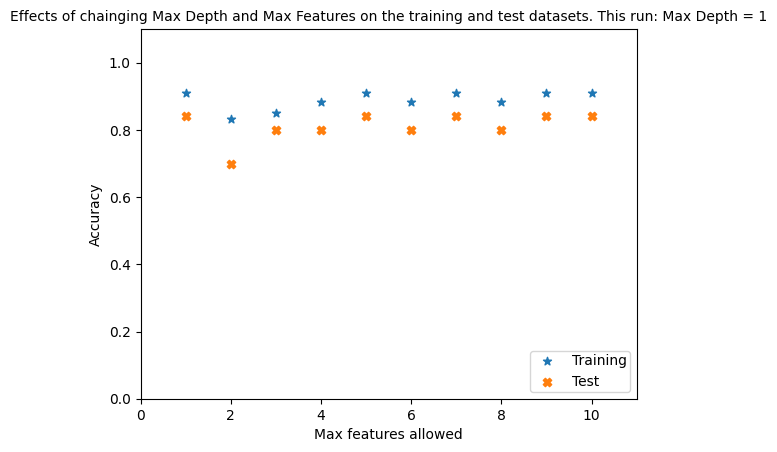

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


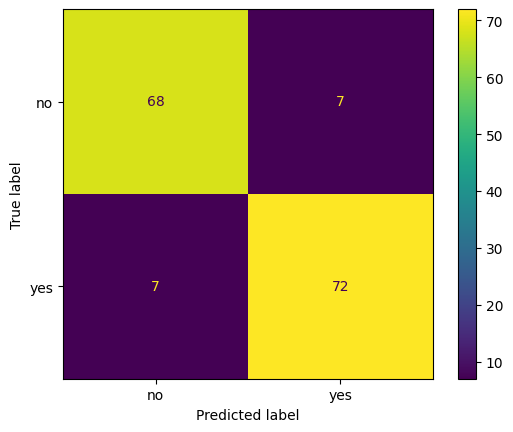

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


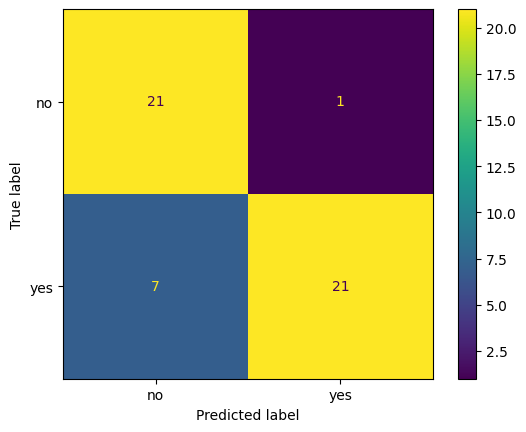

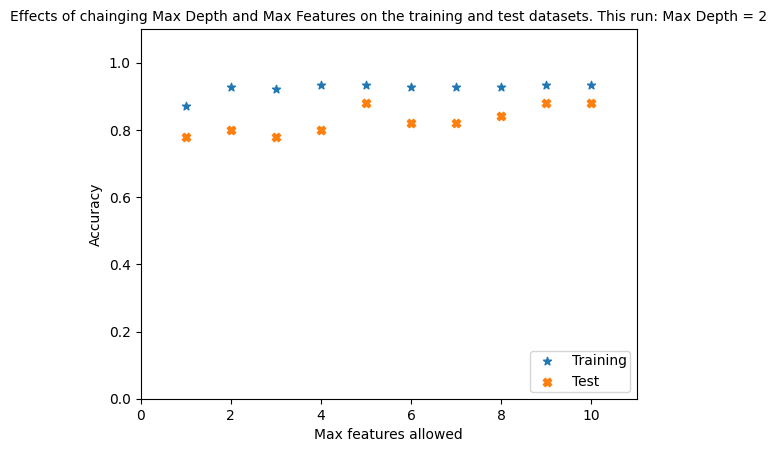

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


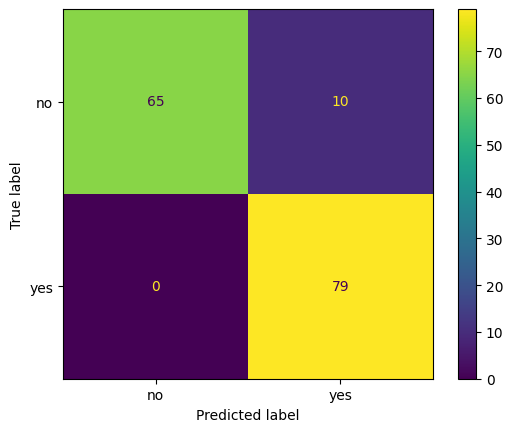

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


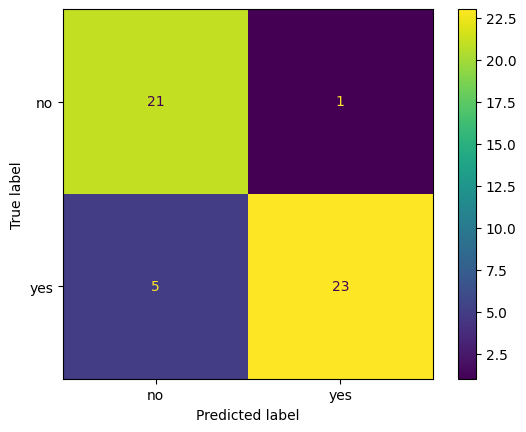

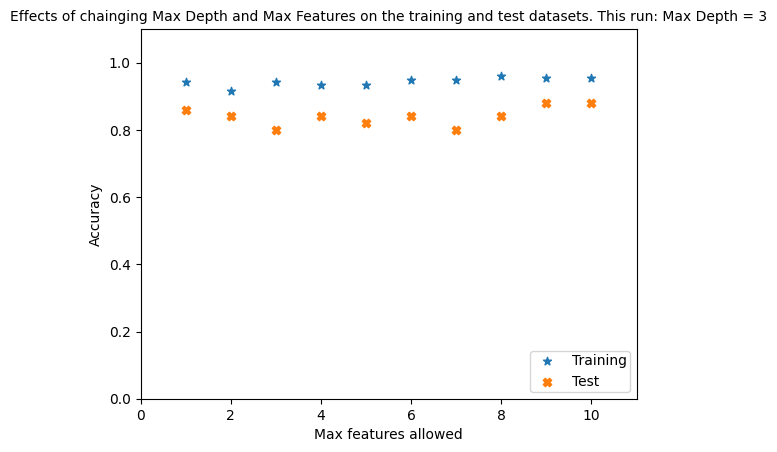

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


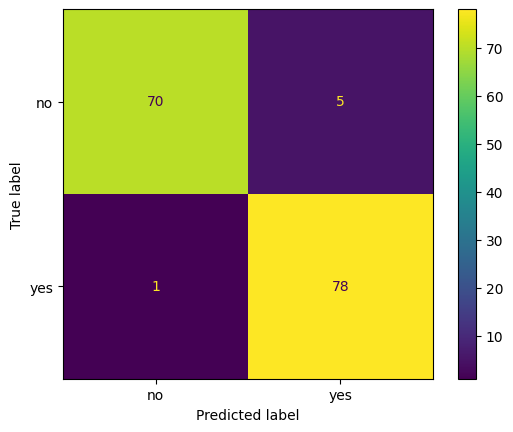

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


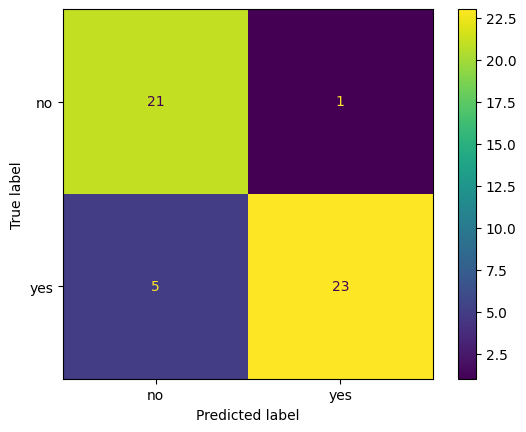

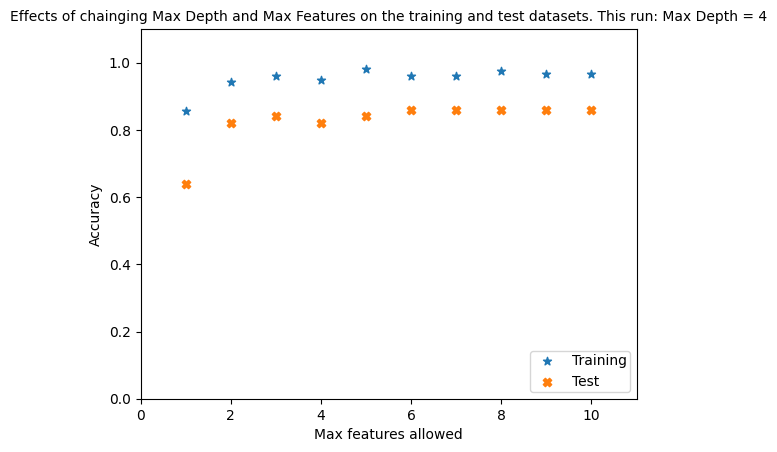

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


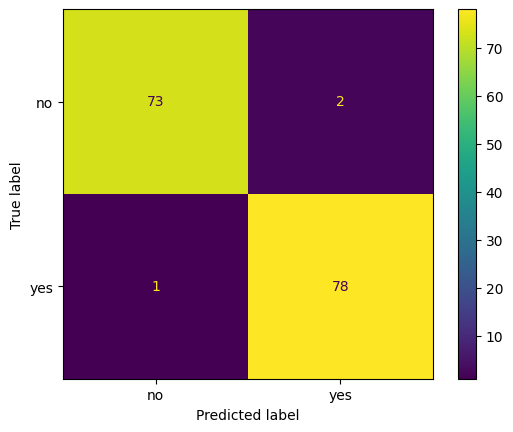

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


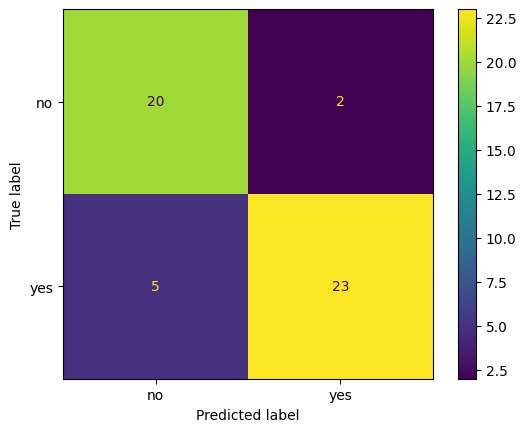

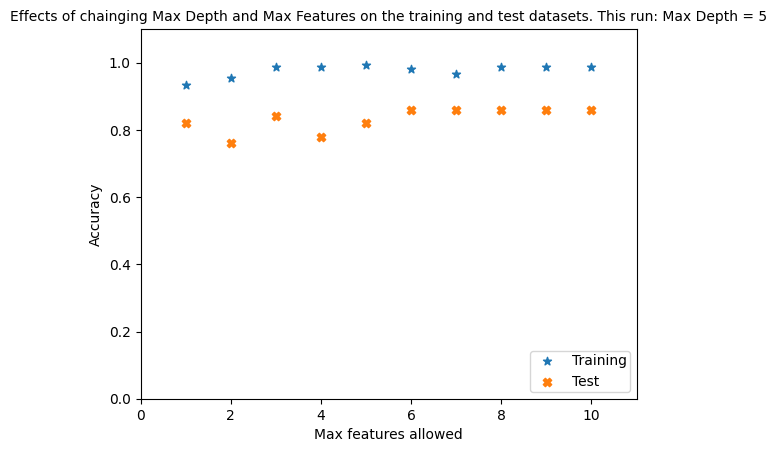

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


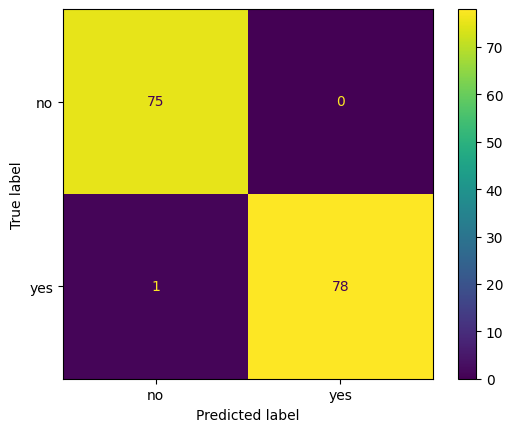

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


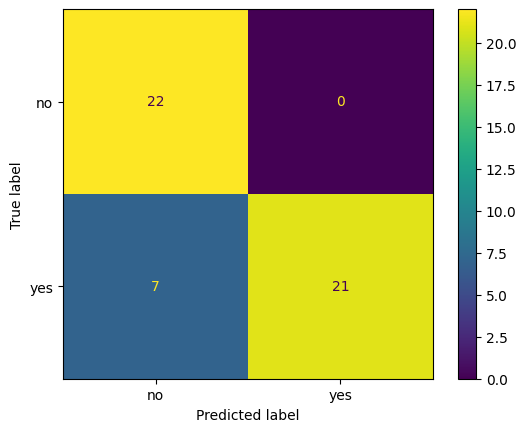

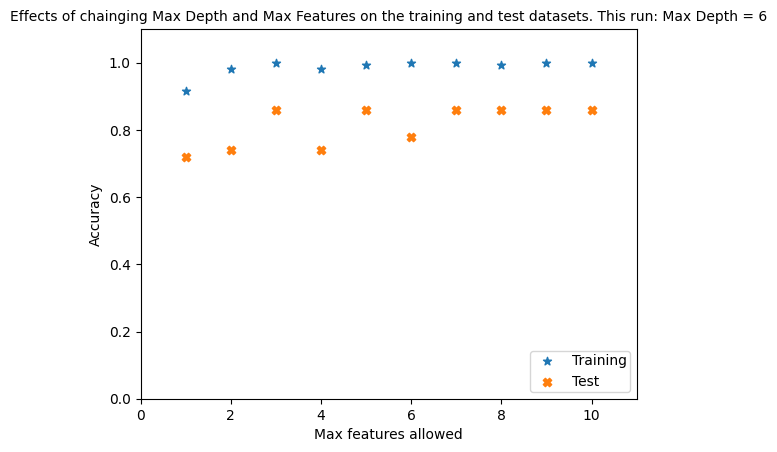

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


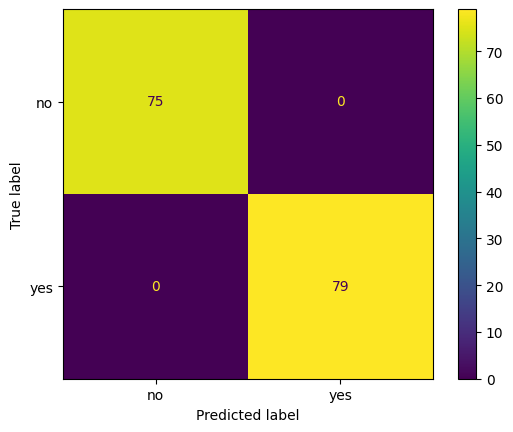

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


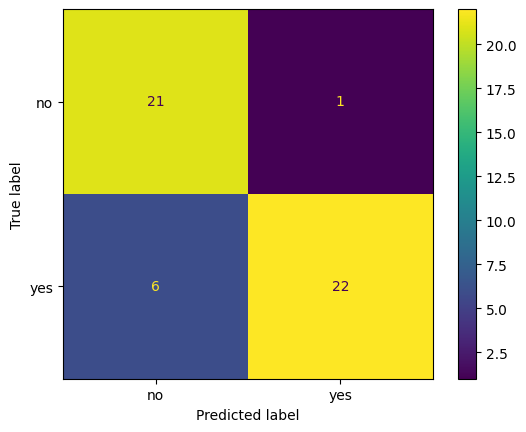

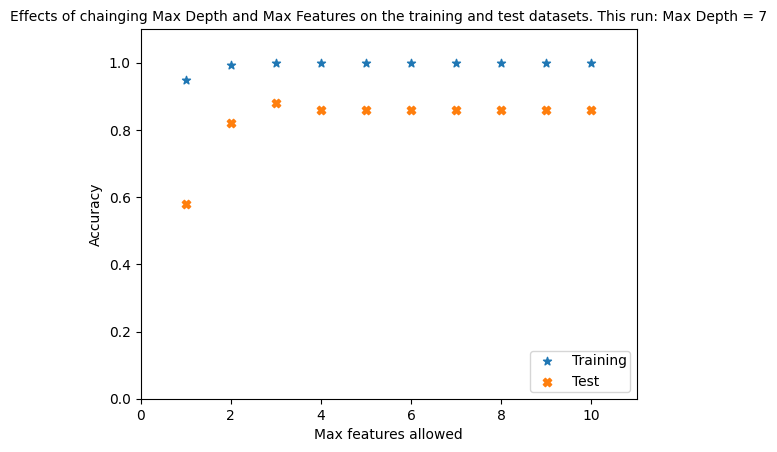

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


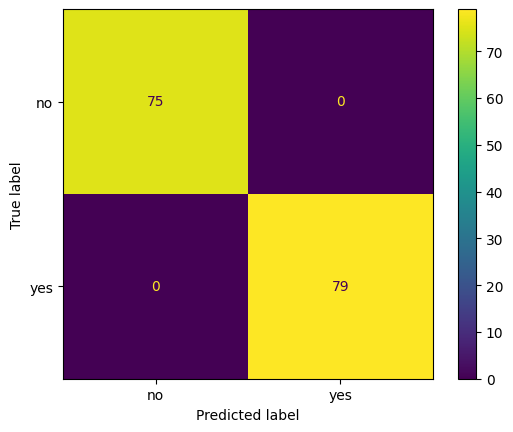

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


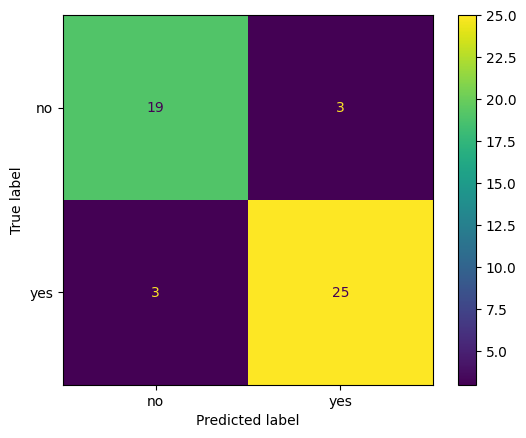

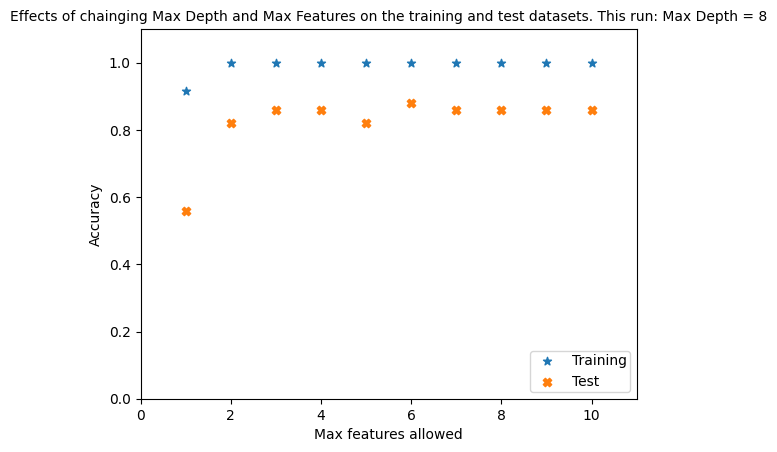

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


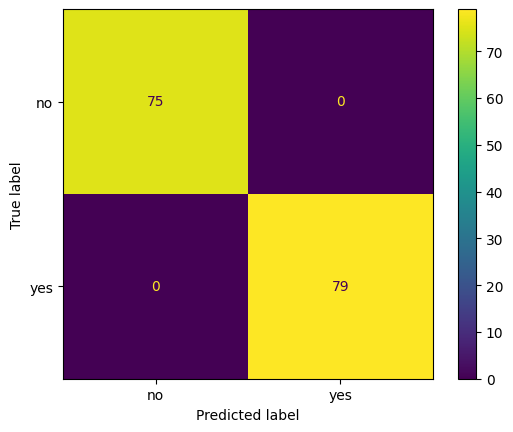

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


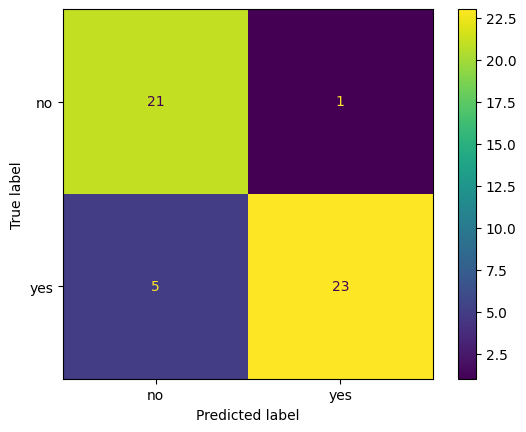

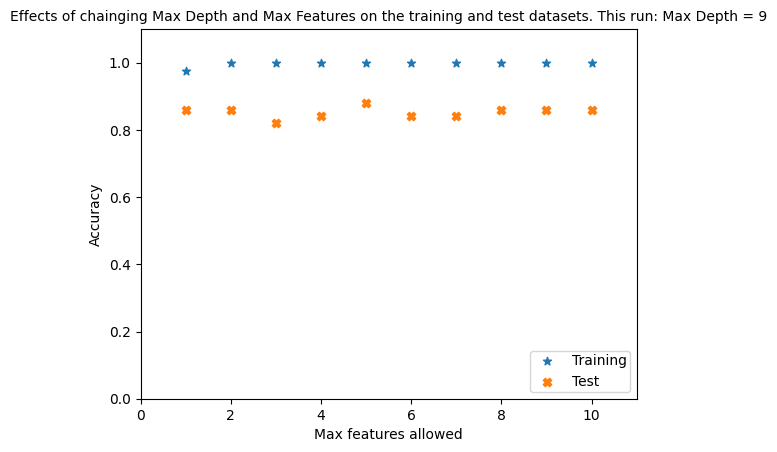

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


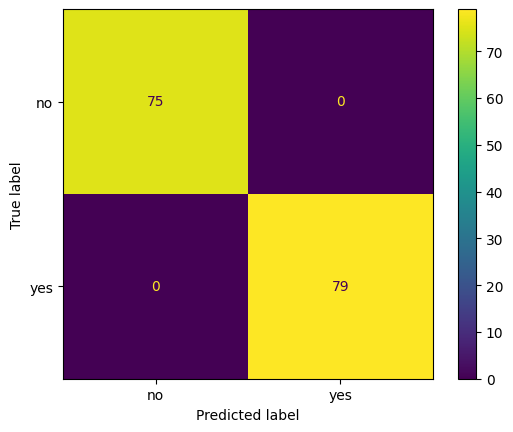

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


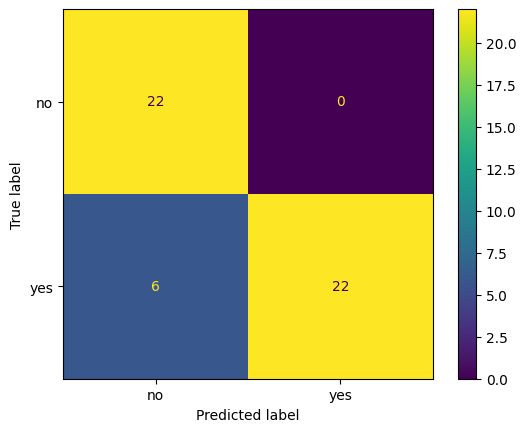

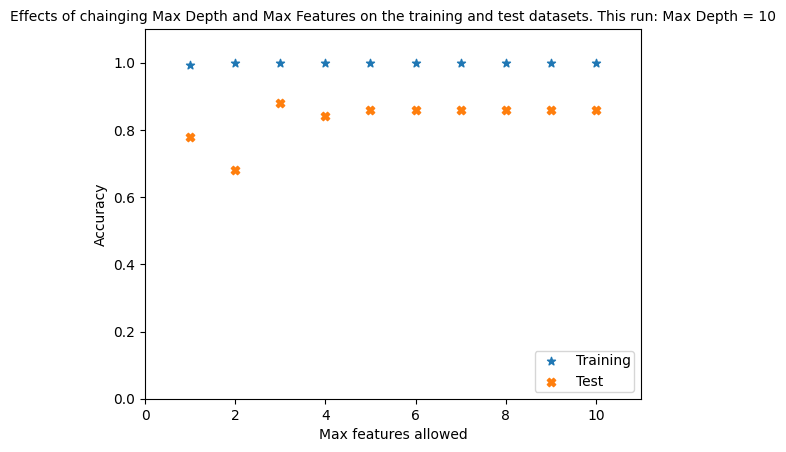

Confusion matrix for the model with the highest prediction accuracy for training dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


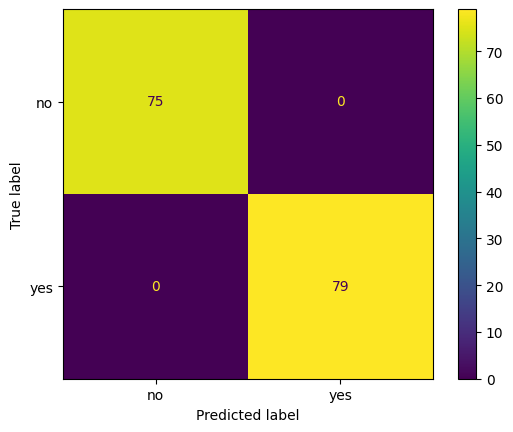

Confusion matrix for the model with the highest prediction accuracy test dataset:


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


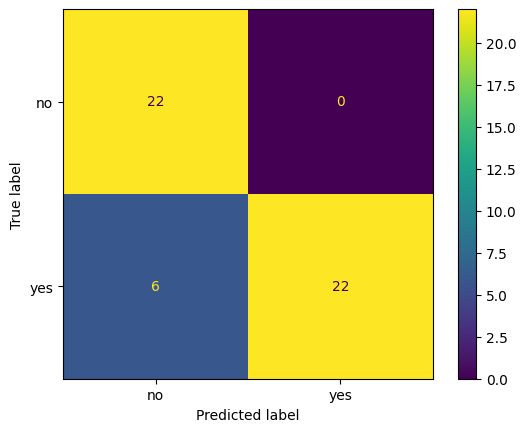

In [4]:
# Training accuracy and test accuracy (Max depth and Max allowed features hyperparameters) in range 1 => 10

for l in range(len(max_depth_range)):
    index = 0;
    run = l+1
    # Define the prediction accuracies of the model for training and test datasets on the scatter plot
    plt.scatter(max_depth_range,training_data_prediction_accuracy[l],marker="*")
    plt.scatter(max_depth_range,test_data_prediction_accuracy[l],marker="X")
    # Set the limits of X and Y axis on the plot
    plt.xlim([0, max(max_depth_range)+1])
    plt.ylim([0.0, 1.1])
    # Set the labels for the plot
    plt.xlabel("Max features allowed")
    plt.ylabel("Accuracy")
    # Set the labels for predicted accuracies
    legend_labels = ["Training","Test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    # Set the title and show the plot
    plt.title("Effects of chainging Max Depth and Max Features on the training and test datasets. This run: Max Depth = %i" %run, fontsize=10)
    plt.show()
    
    # find the model with the most accurate predictions for training dataset out of the 1 - 10 possible max_feature values for this iteration max_depth 
    np_array = np.array(training_data_prediction_accuracy[l])
    max_index = np.unravel_index(np_array.argmax(), np_array.shape)
    
    # find the correct index for the most accurate decision tree in the 1-dimensional array
    if l != 0:
        index = l * 10 + max_index[0]
    else:
        index = max_index[0]

    # Plot the confusion matrix for decision tree models of the most accurate predicion for each max_depth and max_features
    print("Confusion matrix for the model with the highest prediction accuracy for training dataset:")
    conf_matrix = plot_confusion_matrix(decision_tree_models[index], x_axis_training, y_axis_training)
    plt.show()
    
    
    
    # find the model with the most accurate predictions for test dataset out of the 1 - 10 possible max_feature values for this iteration max_depth 
    np_array = np.array(test_data_prediction_accuracy[l])
    max_index = np.unravel_index(np_array.argmax(), np_array.shape)
    
    # find the correct index for the most accurate decision tree in the 1-dimensional array
    if l != 0:
        index = l * 10 + max_index[0]
    else:
        index = max_index[0]

    # Plot the confusion matrix for decision tree models of the most accurate predicion for each max_depth and max_features
    print("Confusion matrix for the model with the highest prediction accuracy test dataset:")
    conf_matrix = plot_confusion_matrix(decision_tree_models[index], x_axis_test, y_axis_test)
    plt.show()
    
    
   

C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Most accurate model for the training dataset
Max training set accuracy: 1.0
Index of max training set accuracy: (5, 2)
Hyperparameter values: max_depth = 6 max_features = 3
Best prediction accuracy for test dataset:  1.0


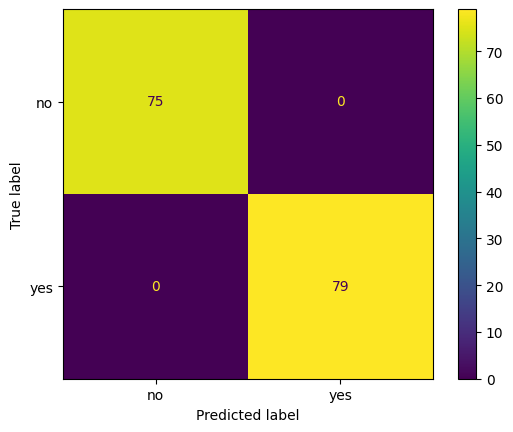

Most accurate model for the test dataset
Max test set accuracy: 0.88
Index of max test set accuracy: (1, 4)
Hyperparameter values: max_depth = 2 max_features = 5
Best prediction accuracy for test dataset:  0.88


C:\PythonEnviroments\ct4101\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


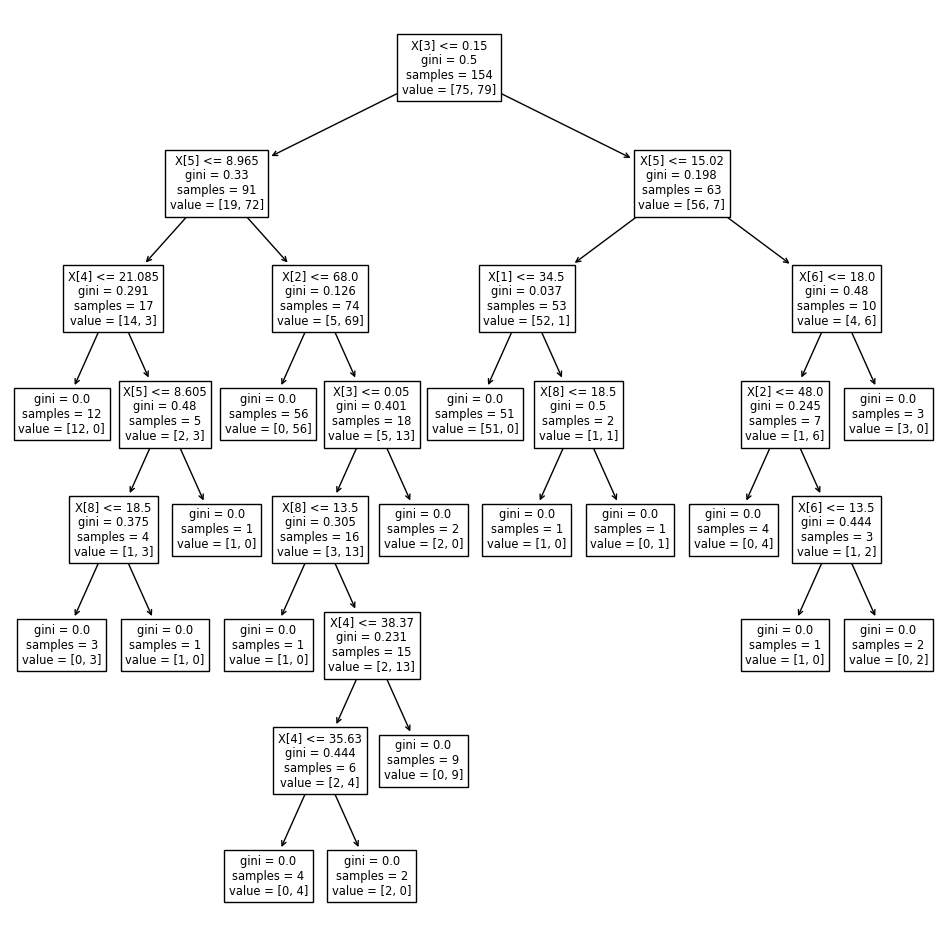

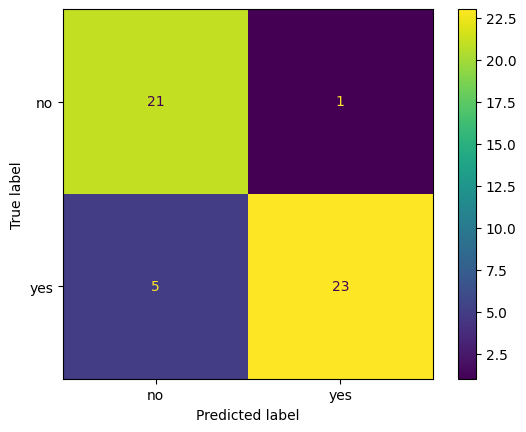

[Text(0.375, 0.875, 'X[4] <= 19.91\ngini = 0.5\nsamples = 154\nvalue = [75, 79]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.5, 0.625, 'X[3] <= 0.15\ngini = 0.302\nsamples = 97\nvalue = [18, 79]'),
 Text(0.25, 0.375, 'X[4] <= 47.555\ngini = 0.162\nsamples = 79\nvalue = [7, 72]'),
 Text(0.125, 0.125, 'gini = 0.334\nsamples = 33\nvalue = [7, 26]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]'),
 Text(0.75, 0.375, 'X[2] <= 45.5\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.125, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]')]

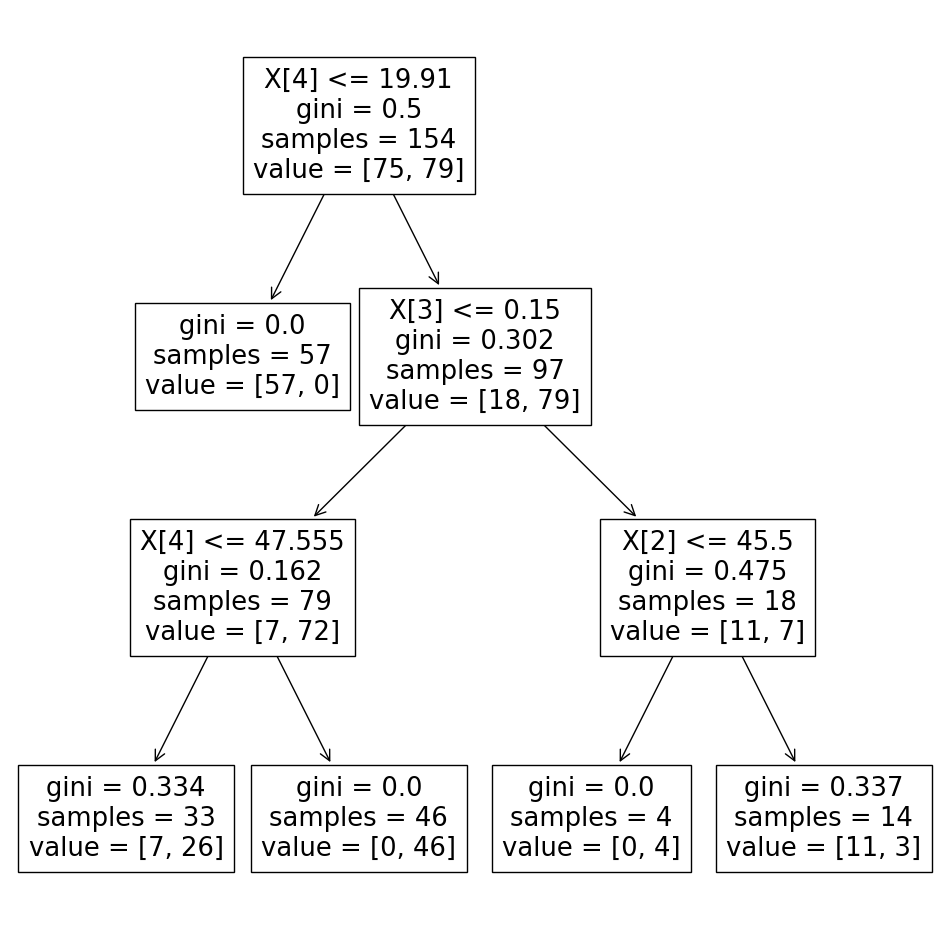

In [5]:
# Find the indices of the model for training dataset with the highest accuracy score
print("Most accurate model for the training dataset")
np_array = np.array(training_data_prediction_accuracy)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max training set accuracy:",np_array.max())
print("Index of max training set accuracy:",max_index)
print("Hyperparameter values: max_depth =",max_depth_range[max_index[0]],"max_features =",max_features[max_index[1]]) 
print("Best prediction accuracy for test dataset: ", np.max(np_array))
# convert the index from 2-d array into 1-d array index
index = max_index[0] * 10 + max_index[1]
# plot the confusion matrix of the most accurate model
conf_matrix = plot_confusion_matrix(decision_tree_models[index], x_axis_training, y_axis_training)
plt.show()
plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree_models[index])





# Find the indices of the model for test dataset with the highest accuracy score
print("Most accurate model for the test dataset")
np_array = np.array(test_data_prediction_accuracy)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Max test set accuracy:",np_array.max())
print("Index of max test set accuracy:",max_index)
print("Hyperparameter values: max_depth =",max_depth_range[max_index[0]],"max_features =",max_features[max_index[1]]) 
print("Best prediction accuracy for test dataset: ", np.max(np_array))
# convert the index from 2-d array into 1-d array index
index = max_index[0] * 10 + max_index[1]
# plot the confusion matrix of the most accurate model
conf_matrix = plot_confusion_matrix(decision_tree_models[index], x_axis_test, y_axis_test)
plt.show()
plt.figure(figsize=(12,12))
tree.plot_tree(decision_tree_models[index])